In [15]:
from micrograd.engine import Value
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [50]:
from random import uniform
import numpy as np
from tqdm import tqdm
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

10


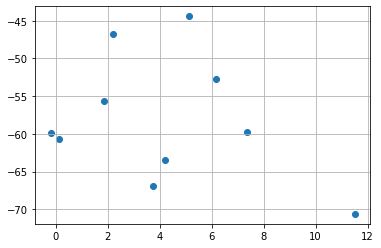

In [220]:
def linear_dataset(count=300, y_intercept=-30, slope=4, spread=15.0):
    X = np.array([i+(uniform(-spread, spread)) for i in range(count)])
    y = np.array([y_intercept+i*slope+(uniform(-spread, spread)) for i in range(count)])
    return X, y

data_X, data_y = linear_dataset(10, -45.0, -3, 5)
m = len(data_X); print(m)

data_X = data_X.reshape(-1)

plt.scatter(data_X, data_y)
plt.grid()

(Value(data=-7.2283753990102175, grad=0),
 Value(data=-10.649678205375455, grad=0))

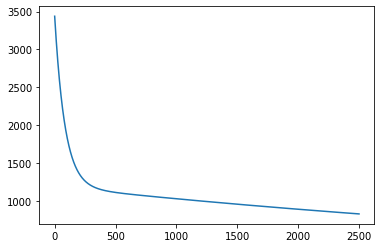

In [221]:
w = Value(0) # target weight is 1
b = Value(0) # target bias is   0

lr = 0.0001
losses = []

for i in range(2500):
    forward = data_X * w + b
    loss = (1/m)*np.sum((forward-data_y)**2)
    losses.append(loss)
    loss.backward()

    w += -lr * w.grad
    b += -lr * b.grad
    
plt.plot([i.data for i in losses])
w, b

In [219]:
w.grad, b.grad

(0, 0)

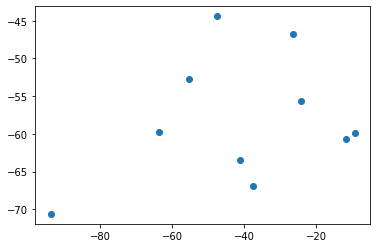

In [222]:
plt.scatter([i.data for i in data_X * w + b], data_y)